# NAME: SAKSHI MODI
## CLASS: 4BSc DS
### REG NO: 21112022
#### BONUS LAB

# OBJECTIVE
## Create user defined functions for creating the following for a binary classification problem, when y_pred and y_test is given -

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 Score
- Plotting points on a AUC Curve

# APPROACH:
the approach was to code everything from scratch without using inbuilt library and understanding the underlying concept of them.
- Dataset is created
- a class is created within which there are various functions for each evaluation matrix
- class is created to use thge local variable as global variable and create lesser line of code which can further be used for another labs.

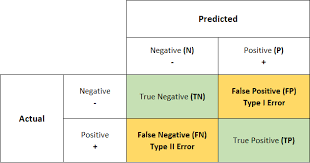

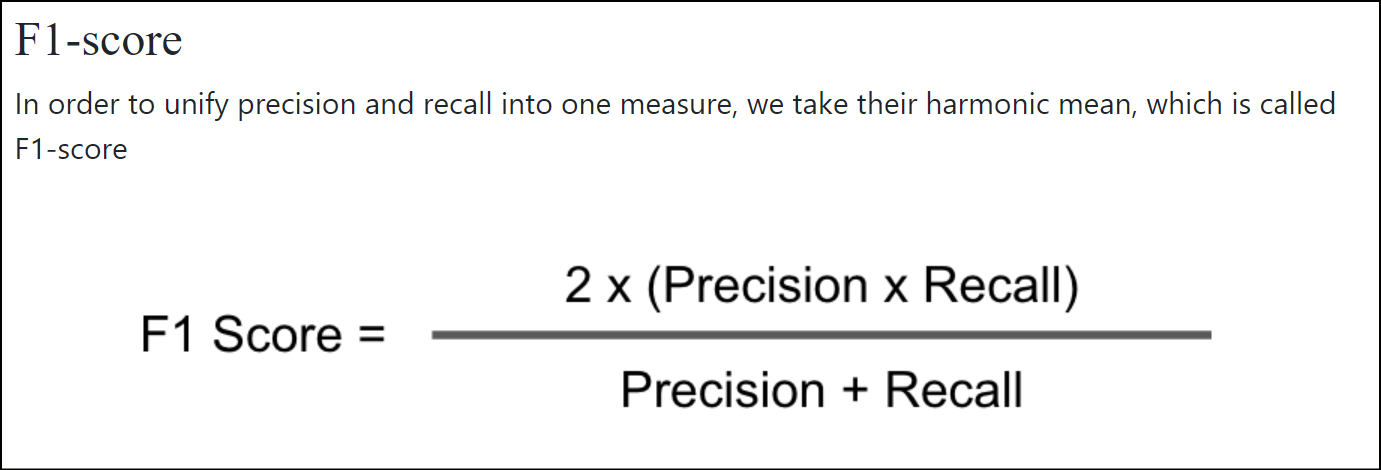

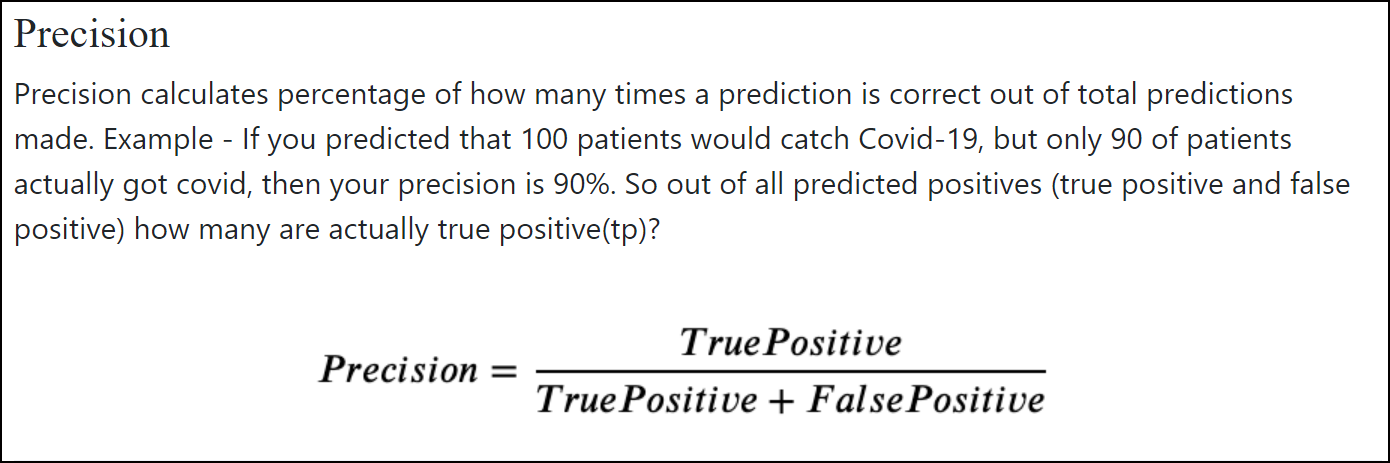

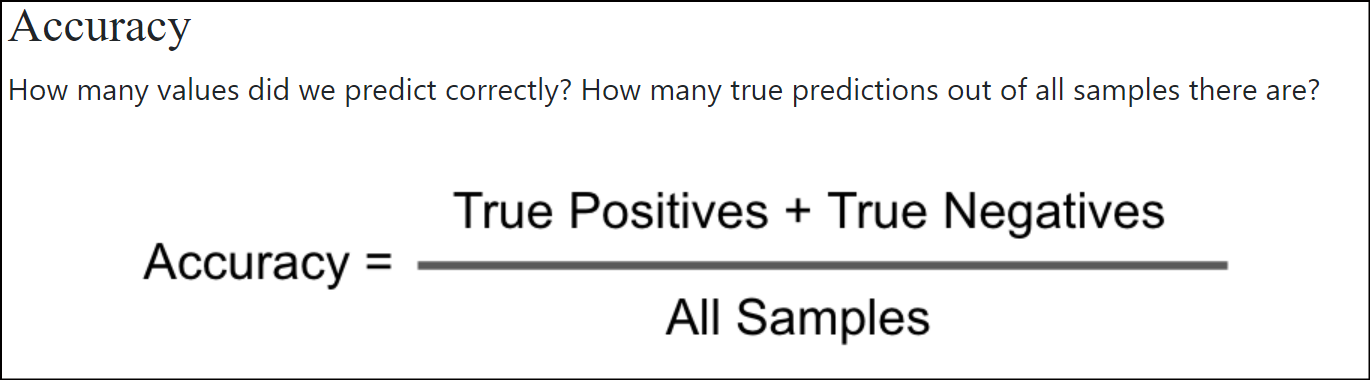

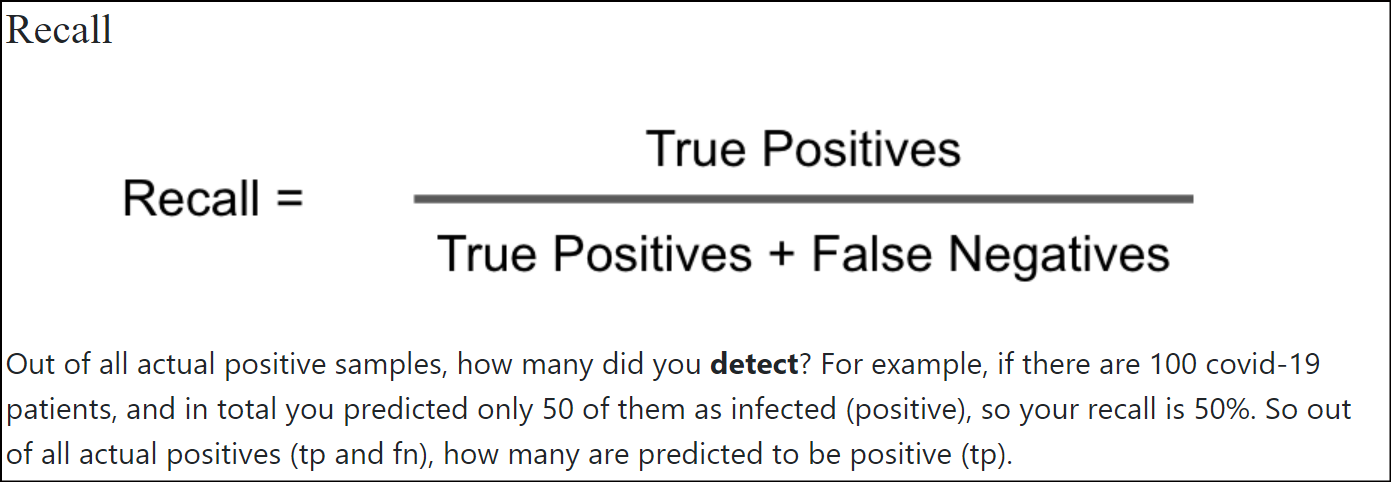

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [64]:
data = pd.read_excel("bonus lab.xlsx")

In [65]:
data

,Y_Test,Y_Pred
0,Yes,No
1,Yes,Yes
2,No,Yes
3,No,No
4,No,No
5,Yes,No
6,Yes,Yes
7,Yes,Yes
8,No,Yes
9,No,Yes


In [66]:
y_test= data["Y_Test"]
y_test

0     Yes
1     Yes
2      No
3      No
4      No
5     Yes
6     Yes
7     Yes
8      No
9      No
10    Yes
11    Yes
12     No
13    Yes
14    Yes
15     No
16     No
17    Yes
18    Yes
19     No
Name: Y_Test, dtype: object

In [67]:
y_pred= data["Y_Pred"]
y_pred

0      No
1     Yes
2     Yes
3      No
4      No
5      No
6     Yes
7     Yes
8     Yes
9     Yes
10     No
11     No
12    Yes
13    Yes
14    Yes
15     No
16    Yes
17     No
18     No
19    Yes
Name: Y_Pred, dtype: object

In [108]:
class Evaluation:
    def __init__(self, actual_values,predicted_values):
        self.actual_values= actual_values
        self.predicted_values= predicted_values
        self.fp = 0 
        self.fn = 0
        self.tp = 0
        self.tn = 0
        
    def confusionMatrix(self):
        

        for actual_value, predicted_value in zip(self.actual_values, self.predicted_values):

            # let's first see if it's a true (t) or false prediction (f)
            if predicted_value == actual_value: # t?
                if predicted_value == 1: # tp
                    self.tp += 1
                else: # tn
                    self.tn += 1
            else: # f?
                if predicted_value == 1: # fp
                    self.fp += 1
                else: # fn
                    self.fn += 1

    
        our_confusion_matrix = [[self.tn, self.fp],[self.fn, self.tp]]
    # we convert it to numpy array to be printed properly as a matrix

        our_confusion_matrix = np.array(our_confusion_matrix)
        s = sns.heatmap(our_confusion_matrix, annot = True)
        s.set_xlabel('Predicted Label', fontsize=10)
        s.set_ylabel('Actual Label', fontsize=10)
        c = plt.show()
        
        return c,our_confusion_matrix
    
    def accuracy(self):
        accuracy= (self.tp+self.tn)/len(self.actual_values)
        
        return accuracy
   
    def precision(self):
        precission= self.tp/(self.tp+self.fp)
        
        return precission
    
    def recall(self):
        recall= self.tp/(self.tp+self.fn)
        
        return recall
    
    def f1Score(self):
        
        f1= (2*((self.tp/(self.tp+self.fp))*(self.tp/(self.tp+self.fn))))/((self.tp/(self.tp+self.fp))+(self.tp/(self.tp+self.fn)))
        
        return f1
   
    def auc(self):
    
        thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        TPR = []
        FPR = []
        for t in thresholds:
            TP_t = sum((self.predicted_values >= t) & (self.actual_values == 1))
            FP_t = sum((self.predicted_values>= t) & (self.actual_values == 0))
            TPR_t = TP_t / self.tp
            FPR_t = FP_t / self.fp
            TPR.append(TPR_t)
            FPR.append(FPR_t)
    
        
        plt.plot(FPR, TPR, 'bo-')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        auc= plt.show()
        
        return auc
    

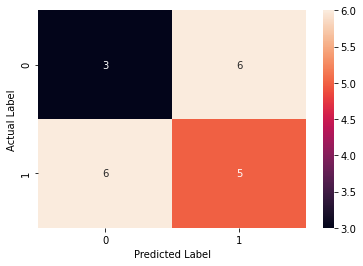

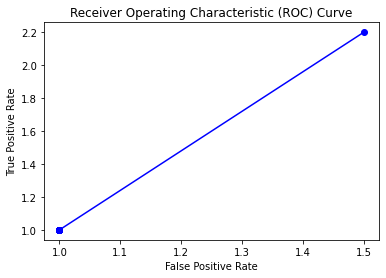

In [116]:
from sklearn.preprocessing import LabelEncoder

Testle = LabelEncoder()
Predle= LabelEncoder()
yTestLe = Testle.fit_transform(data[["Y_Test"]])
yPredtLe = Predle.fit_transform(data[["Y_Pred"]])
evaluation= Evaluation(yTestLe,yPredtLe)
# confusionMatrix(yTestLe, yPredtLe,"confusionMatrix")
evaluation.confusionMatrix()
evaluation.recall()
evaluation.precision()
evaluation.accuracy()
evaluation.f1Score()
evaluation.auc()


# comparing the data with the coded logic

In [107]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[3 6]
 [6 5]]


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate accuracy score
Testle = LabelEncoder()
Predle= LabelEncoder()
yTestLe = Testle.fit_transform(data[["Y_Test"]])
yPredtLe = Predle.fit_transform(data[["Y_Pred"]])
acc_score = accuracy_score(yTestLe , yPredtLe)

# calculate precision
precision = precision_score(yTestLe , yPredtLe)

# calculate recall
recall = recall_score(yTestLe , yPredtLe)

# calculate F1 score
f1 = f1_score(yTestLe , yPredtLe)

# print the scores
print("Accuracy score: ", acc_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy score:  0.4
Precision:  0.45454545454545453
Recall:  0.45454545454545453
F1 score:  0.45454545454545453


C:\Users\saksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
